# Synthetic data

The aim of this notebook is to illustrate the PCA tool using synthetic data.

#### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition
from sklearn import datasets
from scipy.spatial import distance
from geopy.distance import geodesic
from geopy.geocoders import Nominatim

##### Data creation

In [2]:
# Synthetic data
N = 900
alpha = 25
beta = 10
gamma = 25
df = pd.DataFrame()
nb_comp = 5
var = 5
targets = ['Set 1', 'Set 2', 'Set 3']
#df['age'] = np.hstack([np.linspace(10, 50,N//2), np.linspace(50, 100,N//2)]) + np.random.normal(5, 3, N)
df['age'] = np.round(np.random.uniform(0,100, N))
#df['age'] = np.round(np.random.normal(50, 2, N))
df['particle 1'] =  np.random.normal(10, var,N)
df['particle 2'] =  np.hstack([np.random.normal(10, var,N//2), np.random.normal(50, var,N//2)])
df['desease 1'] = df['particle 1']*alpha + beta*df['age']
df['disease 2'] = df['particle 2']*gamma 

print('Synthetic data')
display(df)

Synthetic data


,age,particle 1,particle 2,desease 1,disease 2
0,25.0,14.709261,12.243230,617.731518,306.080742
1,92.0,9.638193,8.196266,1160.954825,204.906657
2,18.0,1.548500,11.274486,218.712494,281.862156
3,71.0,11.167987,8.730128,989.199675,218.253207
4,74.0,1.639325,9.152413,780.983135,228.810325
...,...,...,...,...,...
895,47.0,9.095107,43.011538,697.377670,1075.288455
896,59.0,6.042294,48.404030,741.057357,1210.100761
897,26.0,14.601941,46.668439,625.048530,1166.710987
898,25.0,-0.755431,35.369767,231.114214,884.244175


##### Apply PCA to Data

In [3]:
# Standardizse the features
df_norm = (df-df.mean())/df.std()

# Apply PCA
pca = decomposition.PCA(n_components=5)
PCA_df = pd.DataFrame(data = pca.fit_transform(df_norm), columns=['Component #1', 'Component #2', 'Component #3', 'Component #4','Component #5'])
print("After PCA")
print("Singular values:", pca.singular_values_)

# Append the target Label columns
target = pd.Series(np.hstack([np.zeros(N//2),np.ones(N//2)]) , name='label')

df = pd.concat([df, target], axis = 1)
PCA_df = pd.concat([PCA_df, target], axis = 1)
PCA_df

After PCA
Singular values: [4.29213201e+01 4.21076401e+01 2.96598539e+01 7.02479593e-15
 5.45495807e-15]


,Component #1,Component #2,Component #3,Component #4,Component #5,label
0,1.251825,0.681526,-1.166206,5.831116e-15,-1.466071e-16,0.0
1,-0.434327,2.305070,0.717255,1.733517e-15,-2.819947e-16,0.0
2,2.591862,-0.525009,1.060233,2.213696e-16,3.701651e-15,0.0
3,0.131651,1.830551,0.140566,-5.410648e-17,-1.086374e-16,0.0
4,0.777994,1.116109,1.864699,-7.424472e-17,-1.009780e-16,0.0
...,...,...,...,...,...,...
895,-0.411952,-0.818434,0.013271,6.111981e-19,-8.685626e-17,1.0
896,-0.813487,-1.028099,0.703302,-7.900407e-17,-9.964298e-17,1.0
897,-0.305030,-1.136798,-1.278891,3.576568e-17,-8.961100e-17,1.0
898,1.467708,-1.807545,1.466192,-1.140631e-16,-4.293619e-17,1.0


##### Plots

In [4]:
def plot_PCA(comp_1, comp_2):
    
    x = PCA_df.iloc[:,comp_1]
    y = PCA_df.iloc[:,comp_2]

    # definitions for the axes
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    bottom_h = left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.25]
    rect_histy = [left_h, bottom, 0.25, height]

    # start with a rectangular Figure
    plt.figure(1, figsize=(12, 12))

    axScatter = plt.axes(rect_scatter)
    axHistx = plt.axes(rect_histx)
    axHisty = plt.axes(rect_histy)

    # no labels
    targets = ['young', 'old']

    # the scatter plot:
    for idt, _ in enumerate(targets):
        axScatter.scatter(PCA_df[PCA_df['label'] == idt].iloc[:,comp_1], 
                   PCA_df[PCA_df['label'] == idt].iloc[:,comp_2])


    # now determine nice limits by hand:
    binwidth = 0.2
    xymax = np.max([np.max(np.fabs(x)), np.max(np.fabs(y))])
    lim = (int(xymax/binwidth) + 1) * binwidth

    axScatter.set_xlim((-lim, lim))
    axScatter.set_ylim((-lim, lim))

    bins = np.arange(-lim, lim + binwidth, binwidth)
    axHistx.hist(x, bins=bins)
    axHisty.hist(y, bins=bins, orientation='horizontal')

    axHistx.set_xlim(axScatter.get_xlim())
    axHisty.set_ylim(axScatter.get_ylim())

    axHistx.set_xticks([])
    axHisty.set_yticks([])

    axScatter.legend(targets)
    axScatter.grid()
    axScatter.set_xlabel('Component #'+str(comp_1+1), fontsize = 15)
    axScatter.set_ylabel('Component #'+str(comp_2+1), fontsize = 15)
    plt.show()

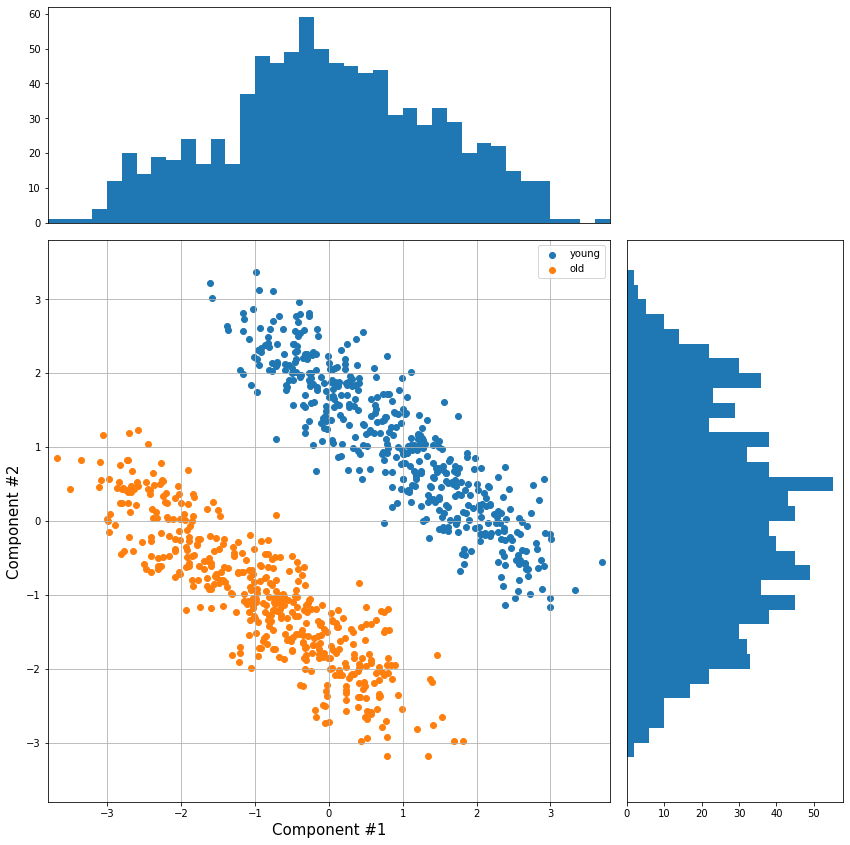

In [5]:
plot_PCA(0,1)

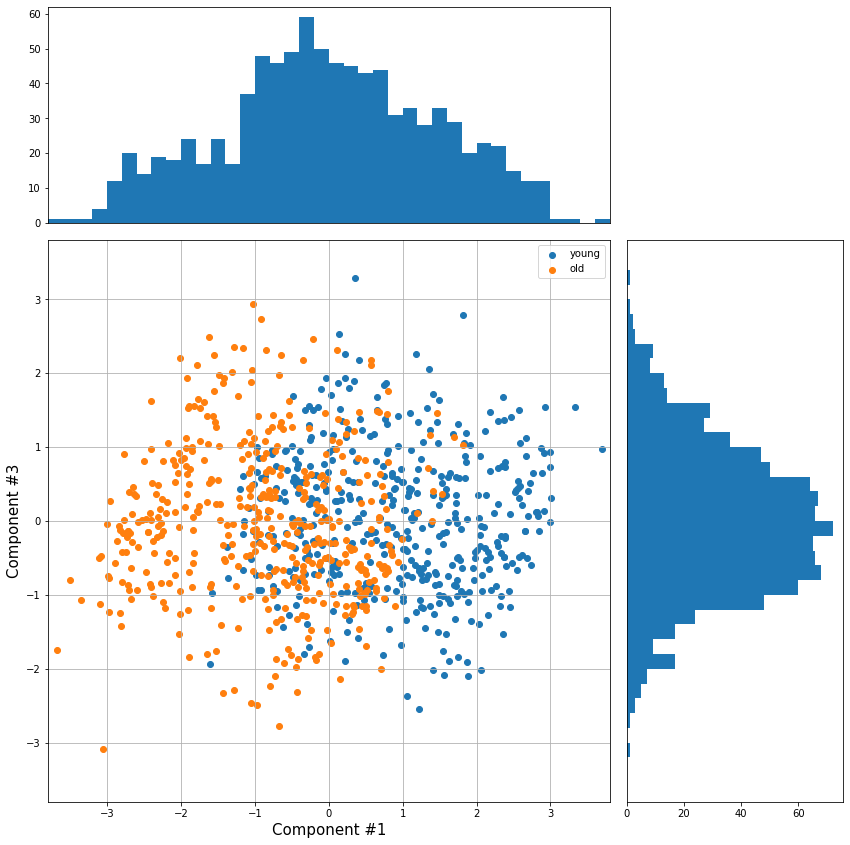

In [6]:
plot_PCA(0,2)

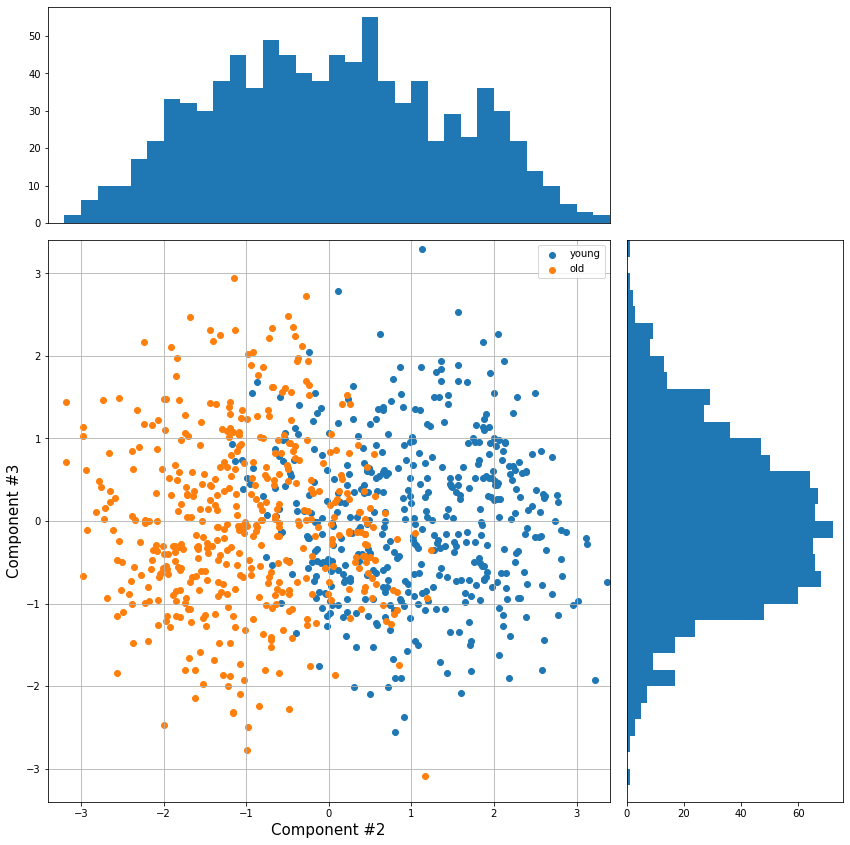

In [7]:
plot_PCA(1,2)

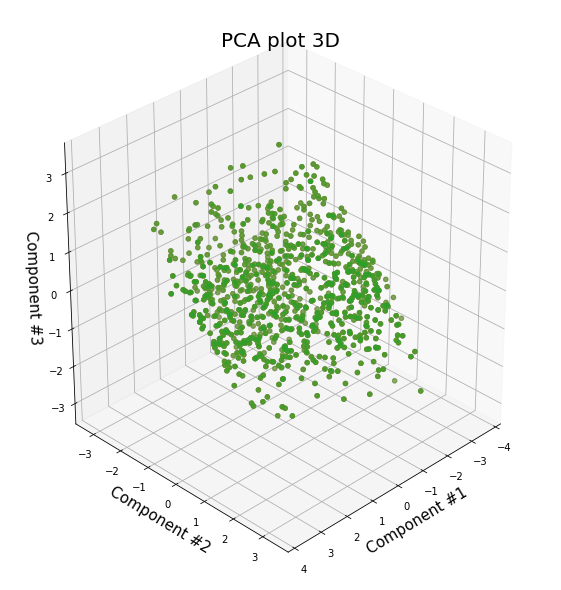

In [8]:
fig = plt.figure(figsize = (8,8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=30, azim=45)

for idt, _ in enumerate(targets):
    ax.scatter(PCA_df.iloc[:,0], 
               PCA_df.iloc[:,1],
               PCA_df.iloc[:,2])

ax.grid()
ax.set_xlabel(PCA_df.columns[0], fontsize = 15)
ax.set_ylabel(PCA_df.columns[1], fontsize = 15)
ax.set_zlabel(PCA_df.columns[2], fontsize = 15)
ax.set_title('PCA plot 3D', fontsize = 20)
plt.show()